In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

### Load data into dataframe

In [34]:
data_train = pd.read_csv("https://github.com/agconti/kaggle-titanic/raw/master/data/train.csv")
data_test = pd.read_csv("https://github.com/agconti/kaggle-titanic/raw/master/data/test.csv")
print('train data:', train_df.shape)
print('test data:', test_df.shape)

train data: (891, 12)
test data: (418, 11)


## Data Exploration

In [8]:
data_train.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S
487,488,0,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C


In [11]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [25]:
len(data_train[data_train['Cabin'].isnull()])

687

In [28]:
for feature in data_train.columns:
    print(feature, 'missing values percentage')
    null_number = len(data_train[data_train[feature].isnull()])
    percent = null_number/len(data_train)                      
    print(percent)

PassengerId missing values percentage
0.0
Survived missing values percentage
0.0
Pclass missing values percentage
0.0
Name missing values percentage
0.0
Sex missing values percentage
0.0
Age missing values percentage
0.19865319865319866
SibSp missing values percentage
0.0
Parch missing values percentage
0.0
Ticket missing values percentage
0.0
Fare missing values percentage
0.0
Cabin missing values percentage
0.7710437710437711
Embarked missing values percentage
0.002244668911335578


#### Observations of train dataset
1. Train dataset has 11 features (6 numeric, 5 object), 1 target ('Survived')
2. 'Cabin', 'Age', 'Embarked' have missing values in this order (77%, 20%, 0,2%).

In [29]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [30]:
for feature in data_test.columns:
    print(feature, 'missing values percentage')
    null_number = len(data_test[data_test[feature].isnull()])
    percent = null_number/len(data_test)                      
    print(percent)

PassengerId missing values percentage
0.0
Pclass missing values percentage
0.0
Name missing values percentage
0.0
Sex missing values percentage
0.0
Age missing values percentage
0.20574162679425836
SibSp missing values percentage
0.0
Parch missing values percentage
0.0
Ticket missing values percentage
0.0
Fare missing values percentage
0.0023923444976076554
Cabin missing values percentage
0.7822966507177034
Embarked missing values percentage
0.0


#### Observations of test dataset
1. test dataset has 11 features - the same as train dataset, but no target.
2. 'Cabin', 'Age' have missing valuesin this order (78%, 21%). 

In [33]:
data_train.describe()

C:\Users\fengh\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Data distribution of train dataset - Numeric features
1. PassengerId is uniqe from 1 to 891 
2. Survived has 2 unique values - 1 as survived and 0 as not survived. Only 38.4% passengers in test dataset survived.
3. Pclass has 3 unique values - 1, 2, 3. Most passengers in Pclass=3.
4. Age ranges from 0.42 (probably infants) to 80. The mean age is around 30. There are some missing values.
4. SibSp has 9 unique values - 0 to 9. The majority of passengers has 0 or 1 SibSp on board.
5. Parch has 7 unique values - 0 to 7. The majority of passenger has 0 Parch on board.
6. Fare ranges from 0 to 512 with mean at 32.

In [32]:
data_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Olsson, Mr. Nils Johan Goransson",male,347082,G6,S
freq,1,577,7,4,644


#### Data distribution train dataset - Object features
1. Name is unique among dataset.
2. Sex has 2 unique values - there are more 'male' (accounts for 65%) than 'famle' (35%).
3. Ticket is not unique. 24% of tickets have duplicate values.
4. Cabin is not unique. 18% of cabins have duplicate values.
4. Embarked has 3 unique values, with 'S' port accounting for majority Embarkation (72%).

#### Decisions
Ticket needs data extraction to extract the key information.
Cabin has too many missing values and duplicate values and its data format is complicated, we might discard this feature.
Embarked can fill in missing values with 'S'.

## Data visualization

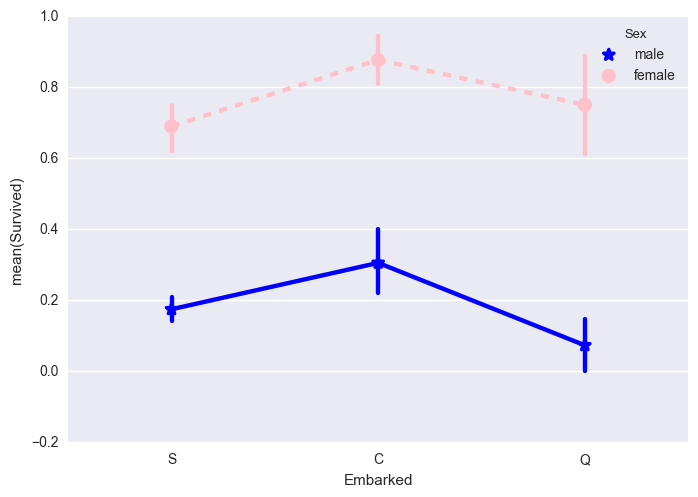

In [41]:
sns.pointplot(x='Embarked', y='Survived', hue='Sex', data=data_train, palette={'male':'blue', 'female':'pink'}, markers=["*", "o"], linestyles=['-', '--'])

#### Observation from pointplot above
1. Embarked = C has the highest mean survival rate followed by S and Q
2. Sex = female has much higher survival rate than sex = male in each Embarked.
#### Decisions
1. Add 'Embarked' and 'Sex' to model

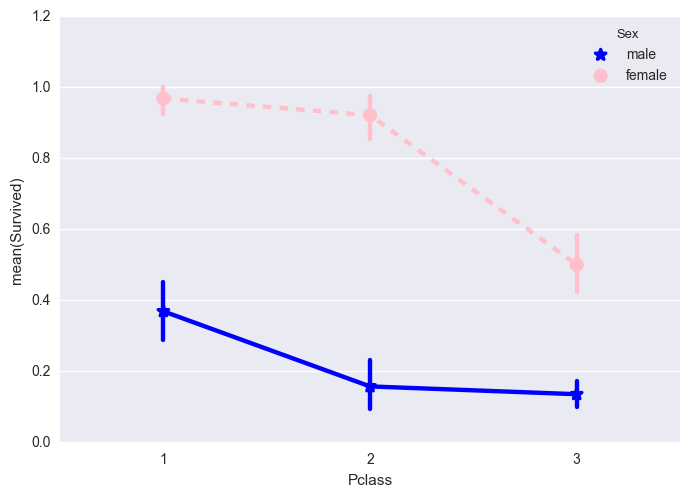

In [37]:
sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=data_train, palette={'male':'blue', 'female':'pink'}, markers=["*", "o"], linestyles=['-', '--'])

#### Observation from pointplot above
1. Pclass = 1 has the highest mean survival rate followed by 2 and 3
2. Sex = female has much higher survival rate than sex = male in each PClass.

#### Decisions:
Add 'Pclass' and 'Sex' to model.

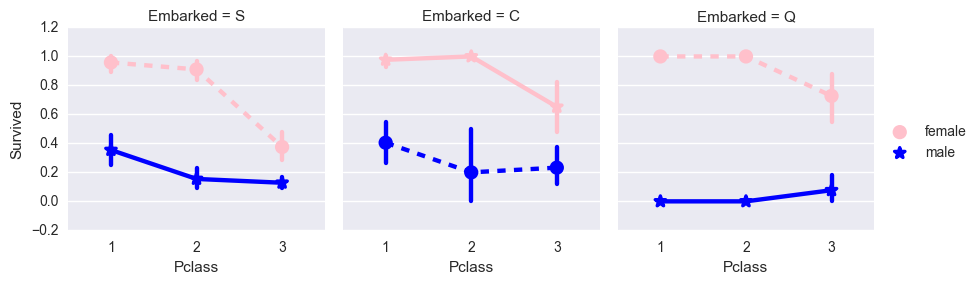

In [45]:
grid = sns.FacetGrid(data_train, col='Embarked')
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette={'male':'blue', 'female':'pink'}, markers=["*", "o"], linestyles=['-', '--'])
grid.add_legend()

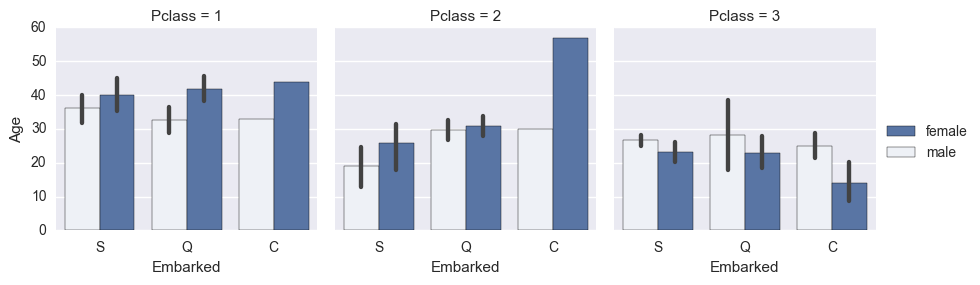

In [50]:
grid = sns.FacetGrid(data_train, col='Pclass')
grid.map(sns.barplot, 'Embarked', 'Age', 'Sex')
grid.add_legend()

#### Observations from barplot above:
1. In Pclass = 1 and 2, female has higher mean age than male. But in Pclass = 3, female has lower mean age than male.
2. Passengers in Pclass = 1 has the highest average age, followed by Pclass = 2 and Pclass = 3.
3. Age trend among Embarked is not abvious

#### Decisions:
Use 'Pclass'and 'Sex' in estimating missing values in 'Age'.

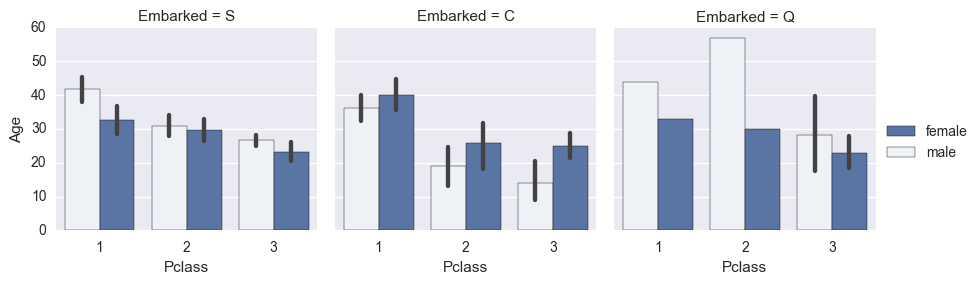

In [51]:
grid = sns.FacetGrid(data_train, col='Embarked')
grid.map(sns.barplot, 'Pclass', 'Age', 'Sex')
grid.add_legend()

### Feature engineering

In [53]:
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df    

def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df


data_train = transform_features(data_train)
data_test = transform_features(data_test)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,male,Student,1,0,1_quartile,N,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,4_quartile,C,"Cumings,",Mrs.
2,3,1,3,female,Young Adult,0,0,1_quartile,N,"Heikkinen,",Miss.
3,4,1,1,female,Young Adult,1,0,4_quartile,C,"Futrelle,",Mrs.
4,5,0,3,male,Young Adult,0,0,2_quartile,N,"Allen,",Mr.


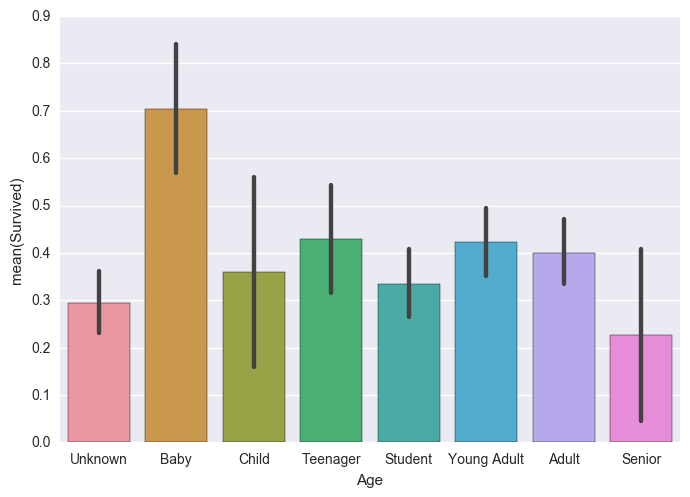

In [54]:
sns.barplot(x="Age", y="Survived",  data=data_train);

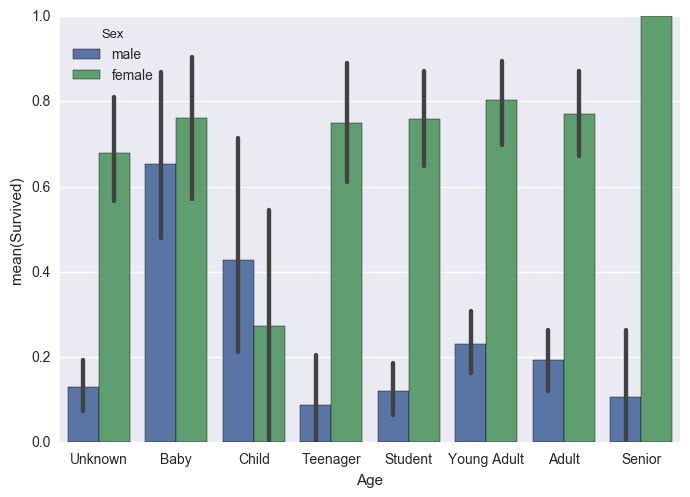

In [57]:
sns.barplot(x="Age", y="Survived", hue="Sex", data=data_train)

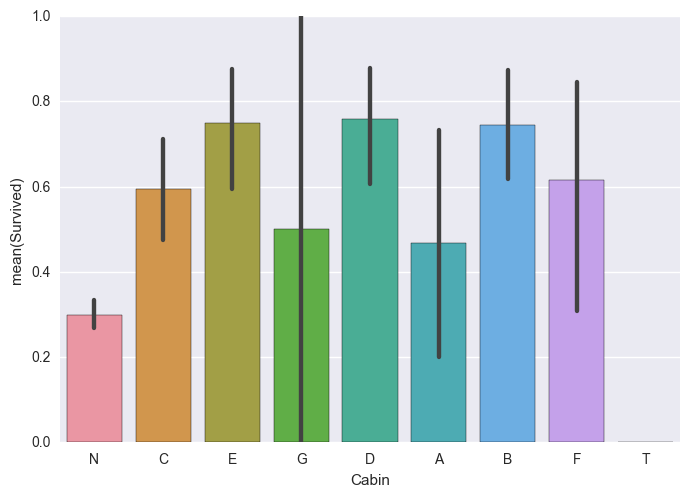

In [58]:
sns.barplot(x="Cabin", y="Survived", data=data_train)

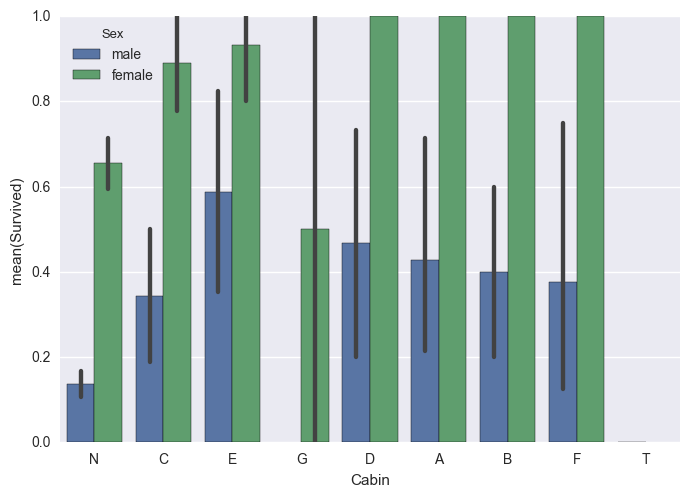

In [56]:
sns.barplot(x="Cabin", y="Survived", hue="Sex", data=data_train)

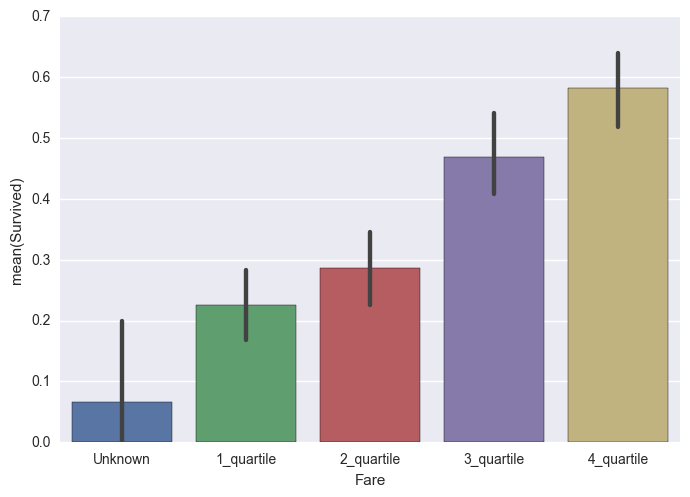

In [59]:
sns.barplot(x="Fare", y="Survived", data=data_train)

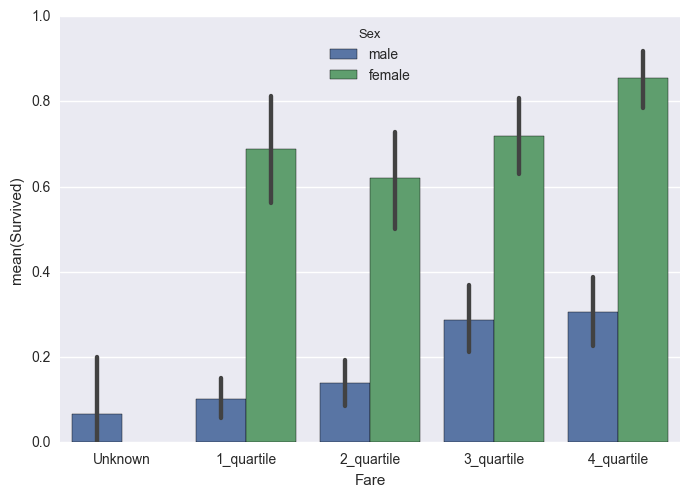

In [61]:
sns.barplot(x="Fare", y="Survived", hue='Sex',  data=data_train)

In [63]:
data_train.sample(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
632,633,1,1,male,Young Adult,0,0,3_quartile,B,"Stahelin-Maeglin,",Dr.
624,625,0,3,male,Student,0,0,3_quartile,N,"Bowen,",Mr.
311,312,1,1,female,Teenager,2,2,4_quartile,B,"Ryerson,",Miss.


## Label encoding

In [65]:
from sklearn import preprocessing
def encode_features(df_train, df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test

data_train, data_test = encode_features(data_train, data_test)
data_train.sample(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
647,648,1,1,1,0,0,0,3,0,730,4
183,184,1,2,1,1,2,1,3,5,66,13
153,154,0,3,1,0,0,2,1,7,867,0


In [66]:
data_test.sample(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
399,1291,3,1,7,0,0,0,7,164,19
171,1063,3,1,7,0,0,0,7,863,19
184,1076,1,0,7,1,1,3,1,216,20


## Split up the training data

In [68]:
from sklearn.model_selection import train_test_split
X_all = data_train.drop(['Survived', 'PassengerId'], axis=1)
y_all = data_train['Survived']

# split training dataset into two parts - 20% for testing and 80% for training model
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=23)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 9) (179, 9) (712,) (179,)


## Fit and tune machine learning algorithm

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=6, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [71]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.815642458101


## Validate with KFold
Is this model actually any good? It helps to verify the effectiveness of the algorithm using KFold. This will split our data into 10 buckets, then run the algorithm using a different bucket as the test set for each iteration.

In [74]:
from sklearn.cross_validation import KFold

def run_kfold(clf):
    kf = KFold(891, n_folds=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X_all.values[train_index], X_all.values[test_index]
        y_train, y_test = y_all.values[train_index], y_all.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(clf)

Fold 1 accuracy: 0.8
Fold 2 accuracy: 0.8539325842696629
Fold 3 accuracy: 0.7865168539325843
Fold 4 accuracy: 0.8651685393258427
Fold 5 accuracy: 0.8089887640449438
Fold 6 accuracy: 0.8314606741573034
Fold 7 accuracy: 0.7752808988764045
Fold 8 accuracy: 0.797752808988764
Fold 9 accuracy: 0.8764044943820225
Fold 10 accuracy: 0.797752808988764
Mean Accuracy: 0.8193258426966292


## Predict the Actual Test Data
And now for the moment of truth. Make the predictions, export the CSV file, and upload them to Kaggle.

In [73]:
ids = data_test['PassengerId']
predictions = clf.predict(data_test.drop('PassengerId', axis=1))

output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
# output.to_csv('titanic-predictions.csv', index = False)
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
